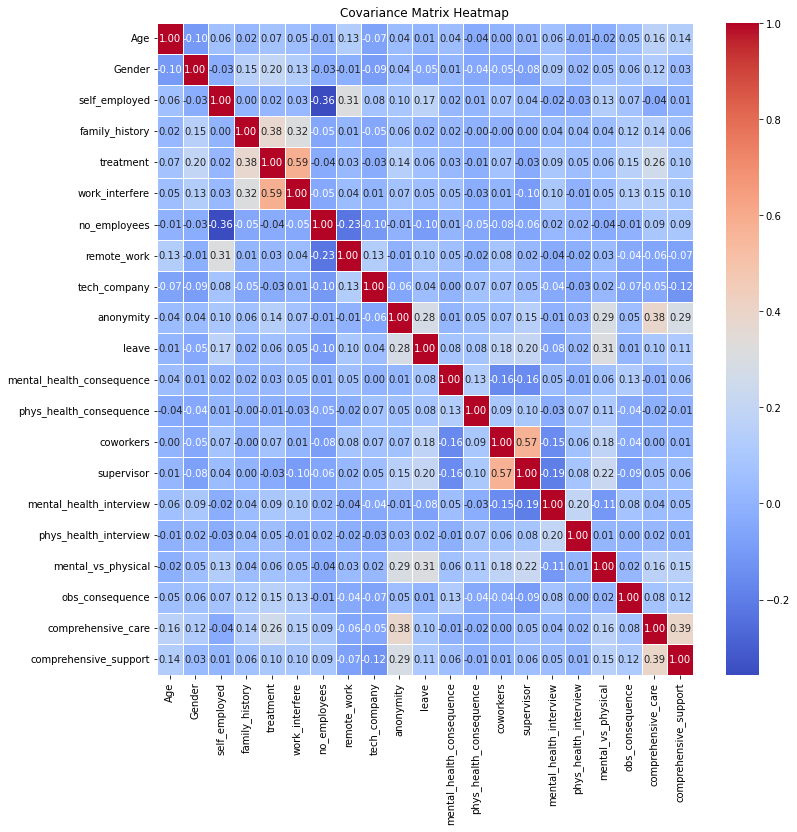

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("survey.csv")
df=df.drop(["Timestamp", "Country", "state", "comments"], axis=1)
df= df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df= df[(df['Age'] >= 18) & (df['Age'] <= 100)]
def encode_age(value):
    if value <=27:
        return 0
    elif 27< value <=31:
        return 1
    elif 31< value <=36:
        return 2
    elif value >36:
        return 3
df['Age'] = df['Age'].apply(encode_age)
df[~df['Gender'].isin(['p', 'A little about you'])]
def encode_gender(value):
    if pd.notna(value):
        value_lower = value.lower()
        if value_lower.startswith(('m', 'male', 'cis m')):
            return 0
        elif value_lower.startswith(('f', 'female', 'w', 'cis f')):
            return 1
    return 2
df['Gender'] = df['Gender'].apply(encode_gender)
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('Never', inplace=True)
df['no_employees'].replace(to_replace='100-500', value='100-1000', inplace=True)
df['no_employees'].replace(to_replace='500-1000', value='100-1000', inplace=True)
df['comprehensive_care'] = df['benefits'].astype(str) + '_' + df['care_options'].astype(str) 
df['comprehensive_support'] = df['wellness_program'].astype(str) + '_' + df['seek_help'].astype(str)
df=df.drop(['benefits', 'care_options', 'wellness_program', 'seek_help'], axis=1)
df2=df
df2.to_csv("SurveyNew.csv")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
dfe = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
dfs = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)
cov_matrix = dfs.cov()
plt.figure(figsize=(12, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()
dfe.to_csv("UpdatedSurvey.csv")

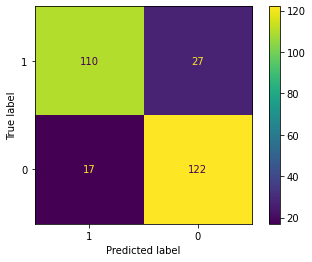

Classification Report of Gradient Boosting:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       137
           1       0.82      0.88      0.85       139

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

Accuracy of Gradient Boosting: 0.8405797101449275


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("UpdatedSurvey.csv")
df=df.drop(["Unnamed: 0"], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop(columns=['treatment'])
X = scaler.fit_transform(X)
y= df['treatment']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.22, stratify=y, random_state=42)
modelG = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
modelG.fit(X_train, y_train)
predictionG = modelG.predict(X_test)
cmG= metrics.confusion_matrix(y_test, predictionG)
cm_disG = metrics.ConfusionMatrixDisplay(confusion_matrix=cmG, display_labels=df['treatment'].unique())
cm_disG.plot()
plt.show()
classG= metrics.classification_report(y_test, predictionG)
print('Classification Report of Gradient Boosting:\n', classG)
scoreG= metrics.accuracy_score(y_test, predictionG)
print('Accuracy of Gradient Boosting:', scoreG)

In [15]:
import tkinter as tk
from tkinter import ttk

all_answers_global = []


class MentalHealthChatbot:
    def __init__(self, root):
        self.root = root
        self.root.title("Mental Health Chatbot")
        self.user_responses = {}
        self.all_answers = []
        self.current_question_index = 0

        self.create_widgets()

    def create_widgets(self):
        self.questions = [
            "Age",
            "Gender",
            "self_employed: Are you self-employed?",
            "family_history: Do you have a family history of mental illness?",
            "work_interfere: If you have a mental health condition, do you feel that it interferes with your studies/work?",
            "no_employees: How many employees/students does your institute or organization have?",
            "remote_work: Do you study online or work remotely at least 50% of the time?",
            "tech_company: Is your institute/organization primarily tech-based?",
            "benefits: Does your institute/organization provide mental health benefits?",
            "care_options: Do you know the options for mental health care your institute/organization provides?",
            "wellness_program: Has your institute/organization officials ever discussed mental health as part of an employee wellness program?",
            "seek_help: Does your institute/organization provide resources to learn more about mental health issues and how to seek help?",
            "anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?",
            "leave: How easy is it for you to take medical leave for a mental health condition?",
            "mental_health_consequence: Do you think that discussing a mental health issue with your institute/organization officials would have negative consequences?",
            "phys_health_consequence: Do you think that discussing a physical health issue with your institute/organization officials would have negative consequences?",
            "coworkers: Would you be willing to discuss a mental health issue with your peer students/coworkers?",
            "supervisor: Would you be willing to discuss a mental health issue with your direct senior/supervisor(s)?",
            "mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?",
            "phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?",
            "mental_vs_physical: Do you feel that your institute/organization takes mental health as seriously as physical health?",
            "obs_consequence: Have you heard of or observed negative consequences for peer students/coworkers with mental health conditions in your class/workplace?",
        ]

        self.create_question_input()

    def create_question_input(self):
        # Remove the previous question and input field
        for widget in self.root.winfo_children():
            widget.destroy()

        current_question = self.questions[self.current_question_index]

        label_text, merged = self.get_label_and_merged(current_question)

        # Display only the question text without the label
        label = ttk.Label(self.root, text=f"{merged if merged else label_text}:", anchor='center')
        label.pack(pady=5)

        if "Age" in current_question:
            entry = ttk.Entry(self.root)
            entry.pack(pady=5)
            self.user_responses[current_question] = entry
        else:
            options = self.get_options(current_question)
            variable = tk.StringVar()
            dropdown = ttk.Combobox(self.root, textvariable=variable, values=options, state="readonly")
            dropdown.pack(pady=5)
            self.user_responses[current_question] = variable

        submit_button = ttk.Button(self.root, text="Next", command=self.submit_answers)
        submit_button.pack(pady=10)

        self.root.geometry(f"{800}x{120}")




    def get_options(self, question):
        if "gender" in question.lower():
            return ["Male", "Female", "Others"]
        elif "self_employed" in question.lower() or "family_history" in question.lower():
            return ["No", "Yes"]
        elif "work_interfere" in question.lower():
            return ["Never", "Rarely", "Sometimes", "Often"]
        elif "no_employees" in question.lower():
            return ["1-5", "6-25", "26-100", "100-1000", "More than 1000"]
        elif "remote_work" in question.lower() or "tech_company" in question.lower() or "obs_consequence" in question.lower():
            return ["No", "Yes"]
        elif "benefits" in question.lower() or "wellness_program" in question.lower() or "seek_help" in question.lower() or "anonymity" in question.lower() or  "mental_vs_physical" in question.lower(): 
            return ["No", "Yes", "Don't know"]
        elif "care_options" in question.lower(): 
            return ["No", "Yes", "Not sure"]
        elif "coworkers" in question.lower() or "supervisor" in question.lower(): 
            return ["No", "Yes", "Some of them"]
        elif "leave" in question.lower():
            return ["Very difficult", "Somewhat difficult", "Don't know", "Somewhat easy", "Very easy"]
        elif "mental_health_consequence" in question.lower() or "phys_health_consequence" in question.lower() or "mental_health_interview" in question.lower() or "phys_health_interview" in question.lower():
            return ["No", "Yes", "Maybe"]
        else:
            return []

    def get_label_and_merged(self, question):
        if ":" in question:
            label_text, merged = question.split(":")
            return label_text, merged.strip()
        else:
            return question, None

    def submit_answers(self):
        global all_answers_global  # Declare global variable

        current_question = self.questions[self.current_question_index]
        current_response = self.user_responses[current_question].get()
        print(f"{current_question}: {current_response}")

        # Append the response to the global list
        all_answers_global.append(current_response)

        self.current_question_index += 1
        if self.current_question_index < len(self.questions):
            self.create_question_input()
        else:
            all_answers_global[0]=int(all_answers_global[0])
            def encode_age(value):
                if value[0] <=27:
                    value[0]=0
                elif 27< value[0] <=31:
                    value[0]=1
                elif 31< value[0] <=36:
                    value[0]=2 
                elif value[0] >36:
                    value[0]=3
            encode_age(all_answers_global)
            def encode_gender(value):
                if pd.notna(value[1]):
                    if value[1]=='Male':
                        value[1]=0
                    elif value[1]=='Female':
                        value[1]=1
                    else:
                        value[1]=2
            encode_gender(all_answers_global)
            a=all_answers_global
            a.append(a[8] + '_' + a[9])
            a.append(a[10] + '_' + a[11])
            indices_to_remove = [8, 9, 10, 11]
            a = [element for index, element in enumerate(a) if index not in indices_to_remove]
            for i in range(len(a)):
                if 2 <=i <= 7 or i==17:
                    if a[i] in ['No', 'Never', '1-5']:
                        a[i]=0
                    elif a[i] in ['Yes', 'Often', '100-1000']:
                        a[i]=1
                    elif a[i] in ['Rarely', '26-100']:
                        a[i]=2
                    elif a[i] in ['Sometimes', '6-25']:
                        a[i]=3
                    else:
                        a[i]=4
                elif (8 <= i <= 11) or (14<= i <= 16):
                    if a[i] in ["'Don't know", "Maybe"]:
                        a[i]=0
                    elif a[i] in ['No', 'Somewhat difficult']:
                        a[i]=1
                    elif a[i] in ['Yes', 'Somewhat easy']:
                        a[i]=2
                    elif a[i] in ['Very difficult']:
                        a[i]=3
                    else:
                        a[i]=4
                elif i==12 or i==13:
                    if a[i] in ["No"]:
                        a[i]=0
                    elif a[i] in ['Some of them']:
                        a[i]=1
                    elif a[i] in ['Yes']:
                        a[i]=2
                elif i==18:
                    if a[i] in ["No_No"]:
                        a[i]=3
                    elif a[i] in ["No_Not sure"]:
                        a[i]=4
                    elif a[i] in ["No_Yes"]:
                        a[i]=5
                    elif a[i] in ["Don't know_No"]:
                        a[i]=0
                    elif a[i] in ["Don't know_Not sure"]:
                        a[i]=1
                    elif a[i] in ["Don't know_Yes"]:
                        a[i]=2
                    elif a[i] in ["Yes_No"]:
                        a[i]=6
                    elif a[i] in ["Yes_Not sure"]:
                        a[i]=7
                    elif a[i] in ["Yes_Yes"]:
                        a[i]=8
                elif i==19:
                    if a[i] in ["No_No"]:
                        a[i]=4
                    elif a[i] in ["No_Don't know"]:
                        a[i]=3
                    elif a[i] in ["No_Yes"]:
                        a[i]=5
                    elif a[i] in ["Don't know_No"]:
                        a[i]=1
                    elif a[i] in ["Don't know_Don't know"]:
                        a[i]=0
                    elif a[i] in ["Don't know_Yes"]:
                        a[i]=2
                    elif a[i] in ["Yes_Don't know"]:
                        a[i]=6
                    elif a[i] in ["Yes_No"]:
                        a[i]=7
                    elif a[i] in ["Yes_Yes"]:
                        a[i]=8
            input_array=a
            input_array = np.array(input_array).reshape(1, -1)  # Reshape to a 2D array
            input_array = scaler.transform(input_array)
            prediction = modelG.predict(input_array)[0]
            if prediction==0:
                self.display_no_message()
            else:
                self.display_yes_message()

            
            
    def display_no_message(self):
        for widget in self.root.winfo_children():
            widget.destroy()

        ttk.Label(self.root, text="The assessment indicates no immediate need for mental health treatment. \nWhile this result offers reassurance, it's crucial to prioritize your well-being. \nShould you have any concerns, consider reaching out to a mental health professional for personalized guidance.").pack(pady=20)
    
    def display_yes_message(self):
        for widget in self.root.winfo_children():
            widget.destroy()

        ttk.Label(self.root, text="The assessment suggests a potential need for mental health evaluation and treatment. \nSeeking professional support is advised to address specific concerns. \nConnect with a mental health professional or healthcare provider for personalized guidance and next steps in your mental health journey.").pack(pady=20)



# Example usage outside the class
if __name__ == "__main__":
    root = tk.Tk()
    chatbot = MentalHealthChatbot(root)
    root.mainloop()

Age: 21
Gender: Male
self_employed: Are you self-employed?: No
family_history: Do you have a family history of mental illness?: No
work_interfere: If you have a mental health condition, do you feel that it interferes with your studies/work?: Never
no_employees: How many employees/students does your institute or organization have?: 1-5
remote_work: Do you study online or work remotely at least 50% of the time?: No
tech_company: Is your institute/organization primarily tech-based?: Yes
benefits: Does your institute/organization provide mental health benefits?: Yes
care_options: Do you know the options for mental health care your institute/organization provides?: Yes
wellness_program: Has your institute/organization officials ever discussed mental health as part of an employee wellness program?: Yes
seek_help: Does your institute/organization provide resources to learn more about mental health issues and how to seek help?: Yes
anonymity: Is your anonymity protected if you choose to take a

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
